In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
mart = pd.read_csv('/content/drive/MyDrive/FoDS/Data/big_mart_sales.csv')

In [ ]:
mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
mart.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3441,FDJ20,20.70,Regular,0.100378,Fruits and Vegetables,122.4388,OUT045,2002,NaN,Tier 2,Supermarket Type1,1238.3880
401,NCJ29,10.60,Low Fat,0.035264,Health and Hygiene,86.1224,OUT045,2002,NaN,Tier 2,Supermarket Type1,426.1120
4215,FDL08,10.80,Low Fat,0.050000,Fruits and Vegetables,243.9144,OUT017,2007,NaN,Tier 2,Supermarket Type1,4655.2736
3121,NCP43,17.75,Low Fat,0.030501,Others,180.5660,OUT035,2004,Small,Tier 2,Supermarket Type1,3415.5540
7956,FDQ24,15.70,Low Fat,0.074083,Baking Goods,253.3724,OUT017,2007,NaN,Tier 2,Supermarket Type1,6795.1548
1737,DRD60,15.70,Low Fat,0.037225,Soft Drinks,182.4634,OUT035,2004,Small,Tier 2,Supermarket Type1,1999.3974
6332,NCP30,20.50,Low Fat,0.032741,Household,40.4822,OUT013,1987,High,Tier 3,Supermarket Type1,589.2330
7309,FDZ21,17.60,Regular,0.065649,Snack Foods,94.8410,OUT010,1998,NaN,Tier 3,Grocery Store,193.0820
7304,FDP22,14.65,Regular,0.099693,Snack Foods,50.9666,OUT017,2007,NaN,Tier 2,Supermarket Type1,717.7324
3580,FDX31,20.35,Regular,0.000000,Fruits and Vegetables,234.4958,OUT045,2002,NaN,Tier 2,Supermarket Type1,1402.1748


In [ ]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [ ]:
def show_cat_col_values():
  for col in cat_cols:
    print(col)
    print('---------')
    print(mart[col].value_counts())
    print('\n')

In [ ]:
mart['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [ ]:
show_cat_col_values()

Item_Fat_Content
---------
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Item_Type
---------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Size
---------
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Outlet_Location_Type
---------
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Outlet_Type
---------
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4868c22d10>,
      dtype=object)

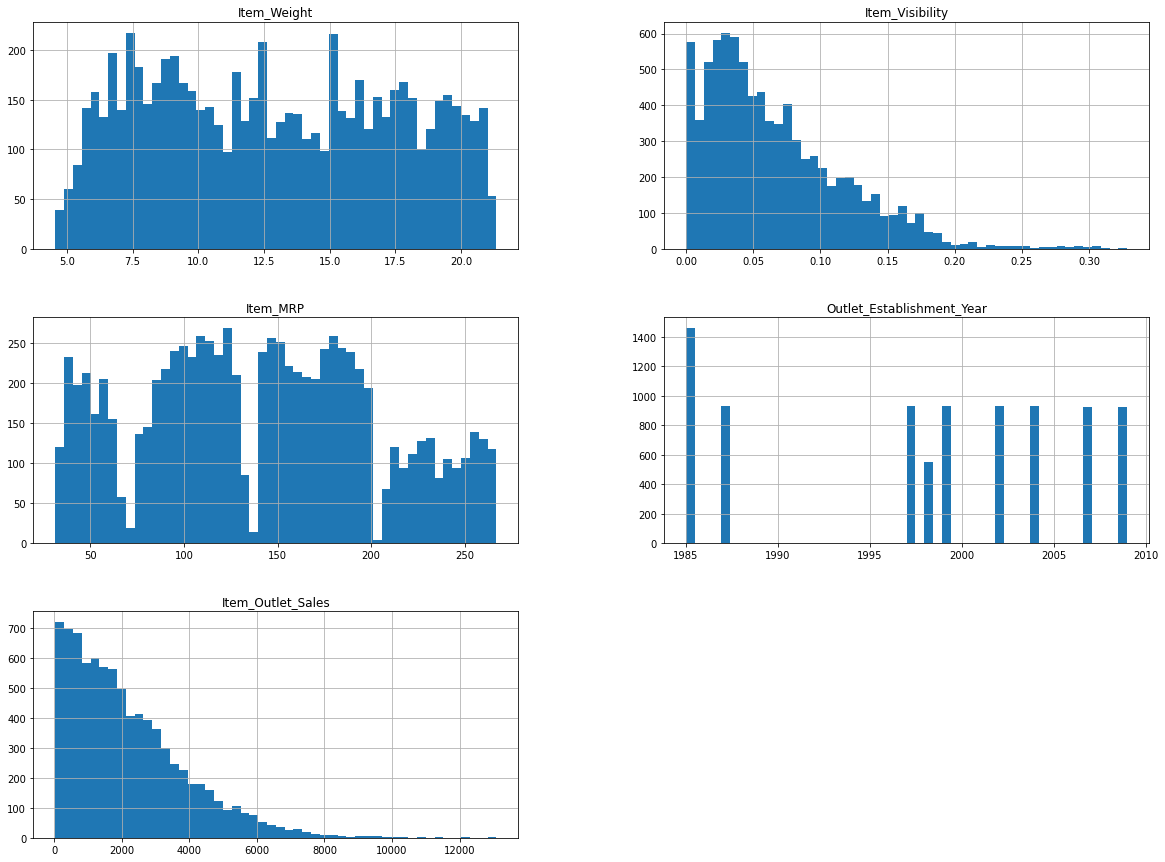

In [ ]:
mart.hist(bins=50, figsize=(20, 15))

In [ ]:
corr_matrix = mart.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
mart['Outlet_Age'] = 2013 - mart['Outlet_Establishment_Year']

In [ ]:
corr_matrix = mart.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Outlet_Age                   0.049135
Name: Item_Outlet_Sales, dtype: float64

# Creating a test set to evaluate the model

- Item mrp is more correlated to sales
- So let us stratify the test samples according to Item mrp

In [ ]:
mart['Rate_cat'] = pd.cut(mart['Item_MRP'],
                          bins=[0., 90.,140.,180.,np.inf],
                          labels=[1,2,3,4])

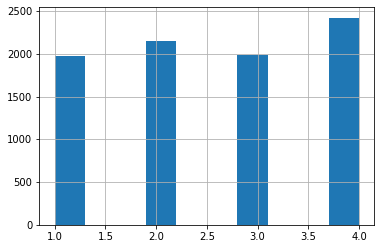

In [ ]:
mart['Rate_cat'].hist()

Since the rate category frequencies are more or less similar, taking random samples for test set would be representative of the data set

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(mart, test_size=0.2, random_state=42)

In [ ]:
for set_ in (train, test):
  set_.drop('Rate_cat', axis=1, inplace=True)

test.drop('Outlet_Age', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Exploratory analysis

In [ ]:
corr_matrix = mart.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Age                   0.049135
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

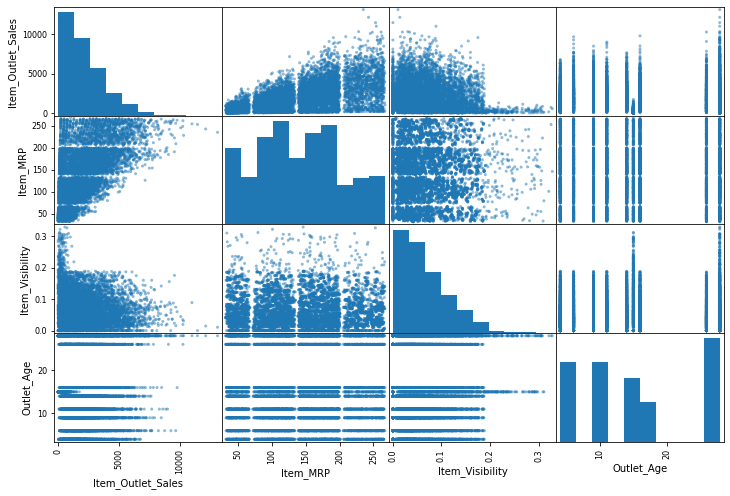

In [ ]:
from pandas.plotting import scatter_matrix

attr = ['Item_Outlet_Sales','Item_MRP','Item_Visibility', 'Outlet_Age']
scatter_matrix(mart[attr], figsize=(12,8));


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

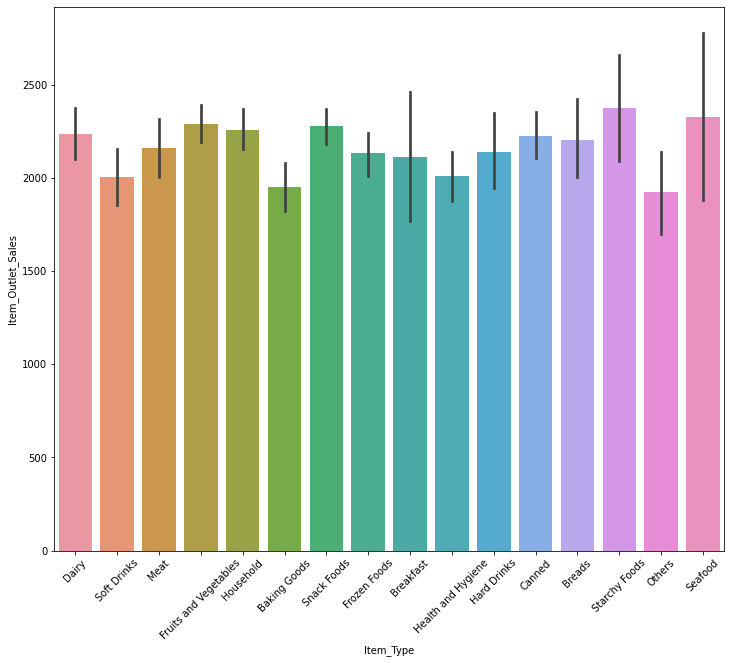

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=mart)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

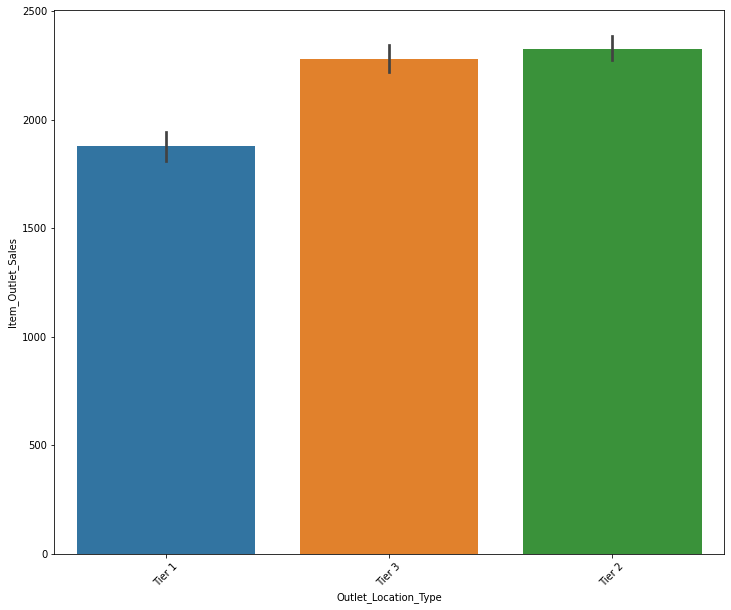

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=mart)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

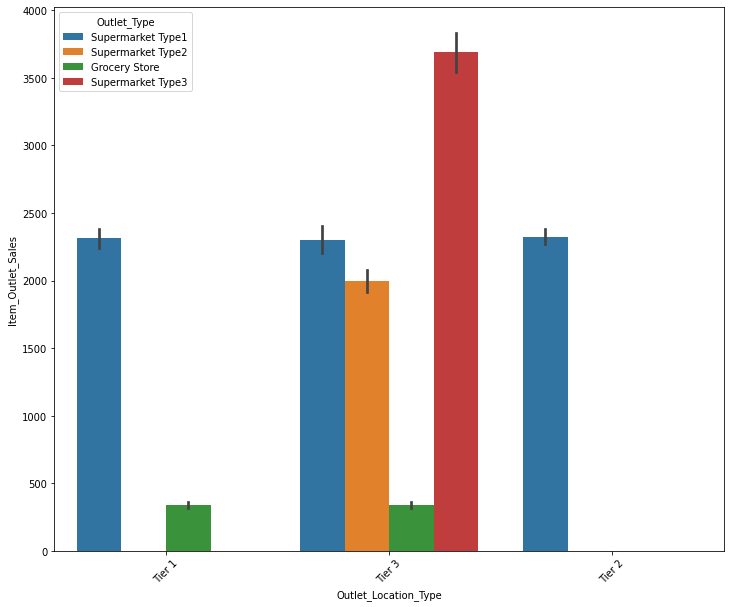

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=mart)
plt.xticks(rotation=45)

- We can see that the sales in tier1 cities are generally low
- Generally grocery store sales are pretty low

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

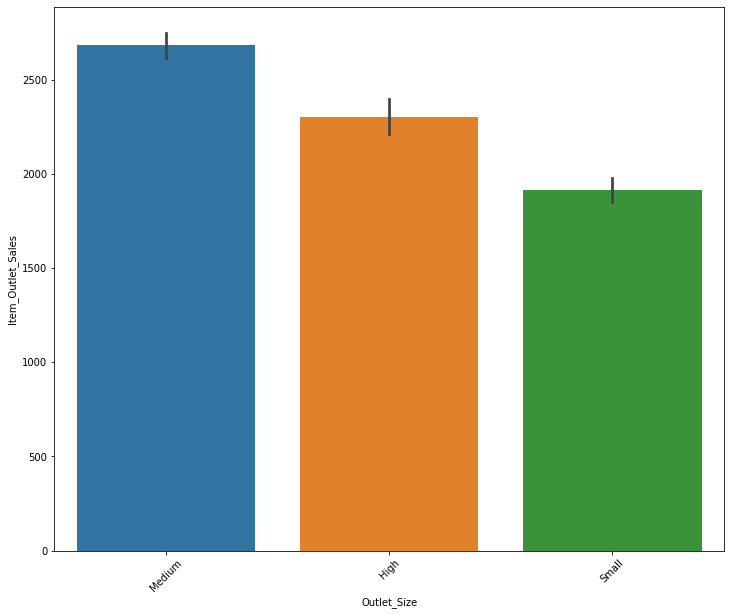

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=mart)
plt.xticks(rotation=45)

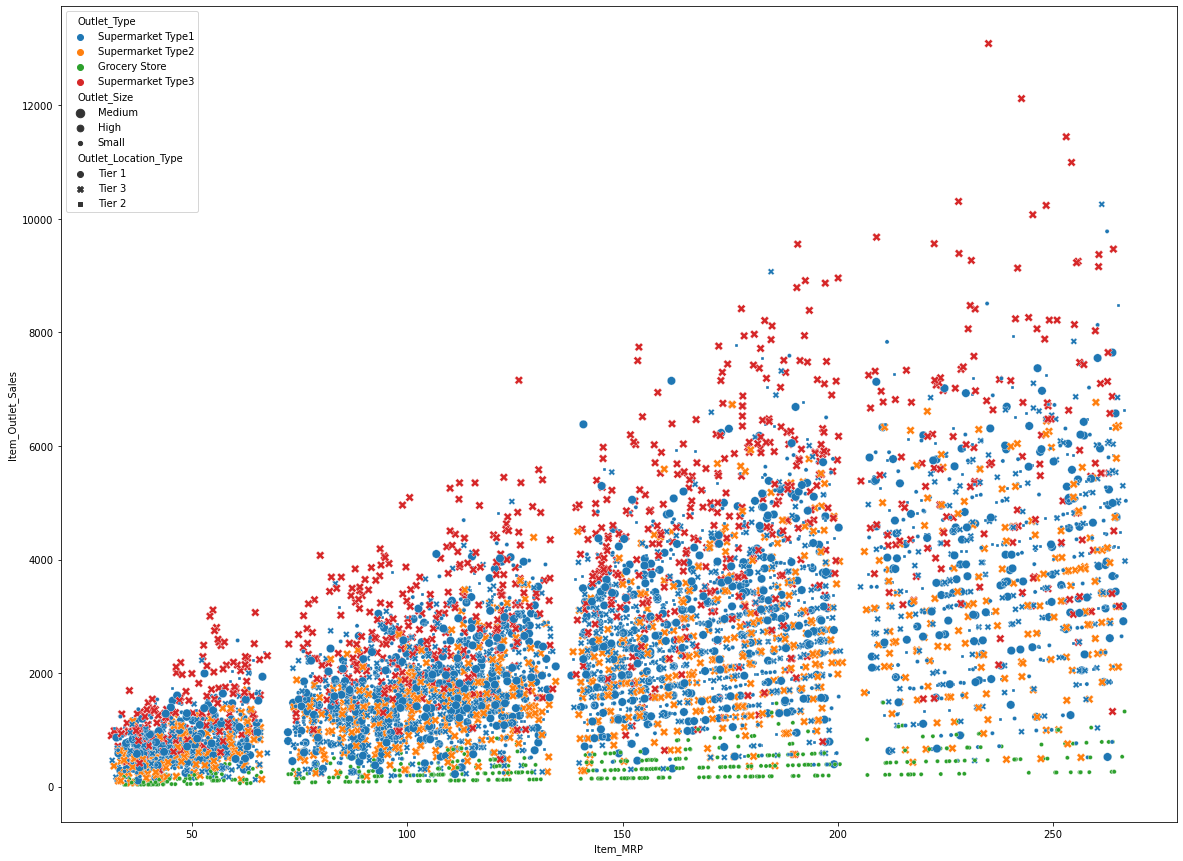

In [ ]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', style='Outlet_Location_Type', size='Outlet_Size', data=mart)

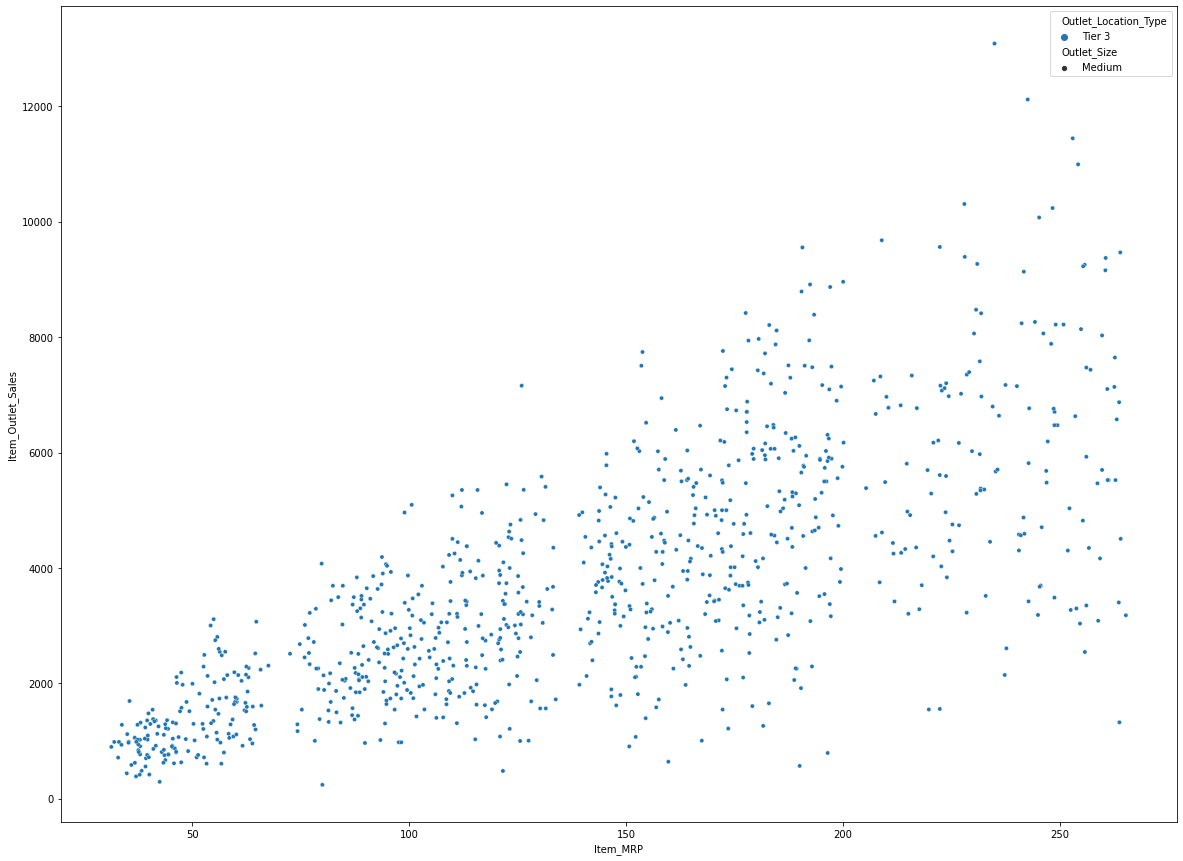

In [ ]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type', size='Outlet_Size', data=mart.loc[mart['Outlet_Type'] == 'Supermarket Type3'])

- It seems that Item outlet sales are high higher mrp products in type3 supermarkets

# Data Cleaning

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class CategoryWiseMeanImputer(BaseEstimator, TransformerMixin):
  def __init__(self, cat_col, categories):
    self.cat_col = cat_col
    self.categories_ = categories
    self.cat_means_ = {}
    self.num_cols_ = []

  def fit(self, X, y=None):
    # self.cat_col = cat_col
    # self.categories_ = X[cat_col].unique()

    self.num_cols_ = X.select_dtypes(include=['float']).columns

    for cat in self.categories_:
      X_cat = X.loc[X[self.cat_col] == cat, self.num_cols_]
      self.cat_means_[cat] = X_cat.mean()

    return self

  def transform(self, X, y=None):
    nulls = X[self.num_cols_].isnull().sum()
    nulls = nulls[nulls != 0]
    
    for col in nulls.keys():
      missing = X[col].isnull()
      for i, cat in enumerate(X[self.cat_col]):
        if missing.iloc[i]:
          if cat in self.cat_means_.keys():
            X[col][i] = self.cat_means_[cat][col]

    return X[self.num_cols_]
    

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
num_pipeline = Pipeline([
  ('cat_mean_impute', CategoryWiseMeanImputer(cat_col='Item_Type', categories=train['Item_Type'].unique())),
  ('mean_impute', SimpleImputer(strategy='mean')),
  ('std_scaler', StandardScaler()),
])

In [ ]:
train_num = train.select_dtypes(include=['float','int'])

In [ ]:
train_num_prep = num_pipeline.fit_transform(X=train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
train_num_prep = pd.DataFrame(train_num_prep, columns=train.select_dtypes(include='float').columns)

In [ ]:
train_num_prep.isnull().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
dtype: int64

## Categorical data

In [ ]:
class DropIdColumns(BaseEstimator, TransformerMixin):
  def __init__(self, id_cols=[]):
    self.id_cols = id_cols
  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    return X.drop(self.id_cols, axis=1)

In [ ]:
class RemoveUnwantedLabels(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    X['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
    return X

In [ ]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
train_cat = train[cat_cols]

In [ ]:
label_rem = RemoveUnwantedLabels()
train_cat = label_rem.fit_transform(train_cat)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
cat_impute = SimpleImputer(strategy='most_frequent')
cat_impute.fit(train_cat)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [ ]:
train_cat_prep = cat_impute.transform(train_cat)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
label_enc = OrdinalEncoder()
label_enc.fit(train_cat_prep)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [ ]:
label_enc.categories_

[array(['Low Fat', 'Regular'], dtype=object),
 array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
        'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
        'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
        'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object),
 array(['High', 'Medium', 'Small'], dtype=object),
 array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object),
 array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'], dtype=object)]

In [ ]:
train_cat_prep = label_enc.transform(train_cat_prep)

In [ ]:
train_cat_prep

array([[ 1.,  6.,  1.,  0.,  1.],
       [ 0.,  9.,  1.,  1.,  1.],
       [ 1., 10.,  2.,  0.,  1.],
       ...,
       [ 0.,  8.,  1.,  1.,  1.],
       [ 0., 13.,  1.,  1.,  1.],
       [ 0.,  9.,  2.,  0.,  1.]])

#Preprocessing Steps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mart = pd.read_csv('/content/drive/MyDrive/FoDS/Data/big_mart_sales.csv')

In [24]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(mart, test_size=0.2, random_state=42)

In [4]:
num_cols = train.select_dtypes(include=['float','int']).columns
cat_cols = train.select_dtypes(exclude=['float', 'int']).columns
ordinal_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
oneh_cat = ['Item_Type', 'Outlet_Type']

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [6]:
class CategoryWiseMeanImputer(BaseEstimator, TransformerMixin):
  def __init__(self, cat_col, categories):
    self.cat_col = cat_col
    self.categories_ = categories
    self.cat_means_ = {}
    self.num_cols_ = []

  def fit(self, X, y=None):
    # self.cat_col = cat_col
    # self.categories_ = X[cat_col].unique()

    self.num_cols_ = X.select_dtypes(include=['float']).columns

    for cat in self.categories_:
      X_cat = X.loc[X[self.cat_col] == cat, self.num_cols_]
      self.cat_means_[cat] = X_cat.mean()

    return self

  def transform(self, X, y=None):
    nulls = X[self.num_cols_].isnull().sum()
    nulls = nulls[nulls != 0]
    
    for col in nulls.keys():
      missing = X[col].isnull()
      for i, cat in enumerate(X[self.cat_col]):
        if missing.iloc[i]:
          if cat in self.cat_means_.keys():
            X[col][i] = self.cat_means_[cat][col]

    return X[self.num_cols_]

In [7]:
class RemoveUnwantedLabels(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    print('Removed Labels')
    X['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
    return X

In [8]:
numPipeline = Pipeline([
  ('cat_mean_impute', CategoryWiseMeanImputer(cat_col='Item_Type', categories=train['Item_Type'].unique())),
  ('mean_impute', SimpleImputer(strategy='mean')),
  ('std_scaler', StandardScaler()),
])

In [9]:
catCleanUp = Pipeline([
    ('remove_unwanted_labels', RemoveUnwantedLabels()),
    ('mode_impute', SimpleImputer(strategy='most_frequent'))
])

In [10]:
def preprocessData(X,y=None):
  #Drop id columns
  X.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

  #Get the columns of different types
  num_cols = X.select_dtypes(include=['float','int']).columns
  cat_cols = X.select_dtypes(exclude=['float', 'int']).columns
  ordinal_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
  oneh_cols = ['Item_Type', 'Outlet_Type']


  num_prep = numPipeline.fit_transform(X[num_cols.append(pd.Index(['Item_Type']))])

  #Cat cols
  cat_cleaned = catCleanUp.fit_transform(X[cat_cols])
  cat_cleaned = pd.DataFrame(cat_cleaned, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

  #Label Encoding
  label_enc = OrdinalEncoder()
  ordinal_prep = label_enc.fit_transform(cat_cleaned[ordinal_cols])

  #OneHot Encoding
  onehot_enc = OneHotEncoder(sparse=False)
  oneh_prep = onehot_enc.fit_transform(cat_cleaned[oneh_cols])

  return np.c_[num_prep, ordinal_prep, oneh_prep]

In [11]:
X_prepared = preprocessData(train.drop(['Item_Outlet_Sales'], axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Removed Labels


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [12]:
X_prepared

array([[ 0.06377278, -0.60070308,  0.47070929, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.29749648, -0.36215854,  0.45787656, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.19579268,  0.19493285, -0.48262534, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.19579268, -0.91693149,  1.52620691, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.89500627, -0.22818684, -0.38307175, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.87796833, -0.95485942, -0.73811593, ...,  1.        ,
         0.        ,  0.        ]])

In [13]:
y = train['Item_Outlet_Sales'].copy()

In [26]:
val_X_prepared = preprocessData(val.drop(['Item_Outlet_Sales'], axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self.fit(X, **fit_params).transform(X)


Removed Labels


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [27]:
val_y = val['Item_Outlet_Sales'].copy()

#Machine Learning models


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [28]:
def evaluateModel(X, y, model):
  #Train set
  model.fit(X, y)
  y_pred = model.predict(X)
  mse = mean_squared_error(y_pred, y)
  rmse = np.sqrt(mse)

  print(f'Train set score: {rmse}')

  #Validation set
  y_pred = model.predict(val_X_prepared)
  mse = mean_squared_error(y_pred, val_y)
  rmse = np.sqrt(mse)

  print(f'Validation set score: {rmse}')

In [30]:
def crossValidate(X, y, model):
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
  rmse = np.sqrt(-scores)

  print(f'Cross Validation scores: {rmse}')
  print(f'Mean score: {rmse.mean()}')

In [33]:
def gridSearchEvaluator(X, y, model, param_grid):
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
  grid_search.fit(X, y)

  print('Scores')
  cvres = grid_search.cv_results_
  for score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-score), params)

  return grid_search.best_estimator_, grid_search.best_params_

## SVM

### Linear SVR

In [16]:
from sklearn.svm import SVR

In [17]:
linear_svm = SVR(kernel='linear', C=1, epsilon=1.5)

In [18]:
evaluateModel(X_prepared, y, linear_svm)

Train set score: 1296.2842309265357
Cross val score: [1313.65554856 1270.85648341 1288.70350187 1293.49930596 1278.31169416
 1372.12534602 1261.19228555 1376.51945318 1259.8420808  1367.08628073]
Mean Cross val score: 1308.1791980225391


The linear svm is clearly underfitting. Let us try removing some constraints

In [ ]:
linear_svm = SVR(kernel='linear', C=5, epsilon=1.5)
evaluateModel(X_prepared, y, linear_svm)

Train set score: 1193.0428109095697
Cross val score: [1216.87885036 1142.8989717  1181.42508906 1175.38369476 1166.82724129
 1269.42617033 1165.78802975 1252.79362023 1164.42063909 1253.69753916]
Mean Cross val score: 1198.953984574195


We can see that removing some constraints in the linear model is improving the score. Let us try grid search.

In [ ]:
param_grid = [
              {'C': [1, 5, 25, 50, 75], 'epsilon': [0.5, 1.5, 3, 5]}
]

linear_svm = SVR(kernel='linear')

In [ ]:
grid_search = GridSearchCV(linear_svm, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [ ]:
grid_search.fit(X_prepared, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 5, 25, 50, 75],
                          'epsilon': [0.5, 1.5, 3, 5]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_, grid_search.best_score_

({'C': 75, 'epsilon': 3}, -1349591.61546075)

In [ ]:
np.sqrt(-grid_search.best_score_)

1161.719249845138

In [ ]:
cvres = grid_search.cv_results_
for score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-score), params)

1320.9322495826011 {'C': 1, 'epsilon': 0.5}
1320.946229024943 {'C': 1, 'epsilon': 1.5}
1320.9821322253117 {'C': 1, 'epsilon': 3}
1320.961998605684 {'C': 1, 'epsilon': 5}
1205.118955635738 {'C': 5, 'epsilon': 0.5}
1205.0944179123069 {'C': 5, 'epsilon': 1.5}
1205.2002704746405 {'C': 5, 'epsilon': 3}
1205.2604201177196 {'C': 5, 'epsilon': 5}
1166.5616205573426 {'C': 25, 'epsilon': 0.5}
1166.5930349262671 {'C': 25, 'epsilon': 1.5}
1166.5881933094622 {'C': 25, 'epsilon': 3}
1166.6133851785314 {'C': 25, 'epsilon': 5}
1162.5573505377617 {'C': 50, 'epsilon': 0.5}
1162.571113289857 {'C': 50, 'epsilon': 1.5}
1162.7193860123696 {'C': 50, 'epsilon': 3}
1162.7977791677606 {'C': 50, 'epsilon': 5}
1161.7556554049143 {'C': 75, 'epsilon': 0.5}
1161.7768743652132 {'C': 75, 'epsilon': 1.5}
1161.719249845138 {'C': 75, 'epsilon': 3}
1161.7232314984415 {'C': 75, 'epsilon': 5}


### Check for overfitting

In [ ]:
linear_svm_opt = grid_search.best_estimator_
evaluateModel(X_prepared, y, linear_svm_opt)

Train set score: 1158.1987261904978
Cross val score: [1313.55236832 1270.99461365 1288.86000649 1293.41277163 1278.03286258
 1372.1724635  1261.16435576 1376.7732959  1259.86895602 1367.22794332]
Mean Cross val score: 1308.205963716711


We can see that the model is slightly overfitting

### Non linear SVR

In [ ]:
svr = SVR(kernel='poly', degree=4, C=75, epsilon=3)
evaluateModel(X_prepared, y, svr)

Train set score: 1125.8286596129803
Cross val score: [1313.55236832 1270.99461365 1288.86000649 1293.41277163 1278.03286258
 1372.1724635  1261.16435576 1376.7732959  1259.86895602 1367.22794332]
Mean Cross val score: 1308.205963716711


In [ ]:
param_grid = [
              {'degree': [4, 6, 8], 'C': [70, 75, 80], 'epsilon': [2.5, 3, 3.5]}
]

svr = SVR(kernel='poly')

model, params = gridSearchEvaluator(X_prepared, y, svr, param_grid)

Scores
1161.342260883041 {'C': 70, 'degree': 4, 'epsilon': 2.5}
1161.3466884055915 {'C': 70, 'degree': 4, 'epsilon': 3}
1161.3537831973758 {'C': 70, 'degree': 4, 'epsilon': 3.5}
1224.4209885825703 {'C': 70, 'degree': 6, 'epsilon': 2.5}
1224.3980616262647 {'C': 70, 'degree': 6, 'epsilon': 3}
1224.3750653843933 {'C': 70, 'degree': 6, 'epsilon': 3.5}
1295.4069593116963 {'C': 70, 'degree': 8, 'epsilon': 2.5}
1295.3697053361163 {'C': 70, 'degree': 8, 'epsilon': 3}
1295.3407197651927 {'C': 70, 'degree': 8, 'epsilon': 3.5}
1159.2298105913871 {'C': 75, 'degree': 4, 'epsilon': 2.5}
1159.228107265496 {'C': 75, 'degree': 4, 'epsilon': 3}
1159.2290566010486 {'C': 75, 'degree': 4, 'epsilon': 3.5}
1220.5370574764897 {'C': 75, 'degree': 6, 'epsilon': 2.5}
1220.516003072374 {'C': 75, 'degree': 6, 'epsilon': 3}
1220.5012435781136 {'C': 75, 'degree': 6, 'epsilon': 3.5}
1292.7001710922639 {'C': 75, 'degree': 8, 'epsilon': 2.5}
1292.65629256905 {'C': 75, 'degree': 8, 'epsilon': 3}
1292.6171096611008 {'C':

In [ ]:
params

{'C': 80, 'degree': 4, 'epsilon': 2.5}

In [ ]:
param_grid = [
              {'degree': [2, 3, 4], 'C': [80, 85, 90], 'epsilon': [2, 2.5, 3]}
]

svr = SVR(kernel='poly')

model, params = gridSearchEvaluator(X_prepared, y, svr, param_grid)

Scores
1131.756986342503 {'C': 80, 'degree': 2, 'epsilon': 2}
1131.7361869528722 {'C': 80, 'degree': 2, 'epsilon': 2.5}
1131.7272796938153 {'C': 80, 'degree': 2, 'epsilon': 3}
1141.5130947779592 {'C': 80, 'degree': 3, 'epsilon': 2}
1141.5174393268996 {'C': 80, 'degree': 3, 'epsilon': 2.5}
1141.5205852430827 {'C': 80, 'degree': 3, 'epsilon': 3}
1157.0091446883812 {'C': 80, 'degree': 4, 'epsilon': 2}
1157.0276881308205 {'C': 80, 'degree': 4, 'epsilon': 2.5}
1157.0462946105706 {'C': 80, 'degree': 4, 'epsilon': 3}
1129.9791984381802 {'C': 85, 'degree': 2, 'epsilon': 2}
1129.9713666364123 {'C': 85, 'degree': 2, 'epsilon': 2.5}
1129.9552452742419 {'C': 85, 'degree': 2, 'epsilon': 3}
1139.7980463998506 {'C': 85, 'degree': 3, 'epsilon': 2}
1139.7782775615347 {'C': 85, 'degree': 3, 'epsilon': 2.5}
1139.7530866875118 {'C': 85, 'degree': 3, 'epsilon': 3}
1154.9516164618883 {'C': 85, 'degree': 4, 'epsilon': 2}
1154.9459953677022 {'C': 85, 'degree': 4, 'epsilon': 2.5}
1154.9438753908507 {'C': 85, '

In [ ]:
params

{'C': 90, 'degree': 2, 'epsilon': 3}

In [ ]:
param_grid = [
              {'degree': [2, 3], 'C': [90, 130, 150], 'epsilon': [3]}
]

svr = SVR(kernel='poly')

model, params = gridSearchEvaluator(X_prepared, y, svr, param_grid)

Scores
1128.5496659126577 {'C': 90, 'degree': 2, 'epsilon': 3}
1138.2215127930865 {'C': 90, 'degree': 3, 'epsilon': 3}
1119.3739712000438 {'C': 130, 'degree': 2, 'epsilon': 3}
1128.316645070305 {'C': 130, 'degree': 3, 'epsilon': 3}
1116.9881542103508 {'C': 150, 'degree': 2, 'epsilon': 3}
1125.40879959828 {'C': 150, 'degree': 3, 'epsilon': 3}


In [ ]:
param_grid = [
              {'degree': [2], 'C': [500], 'epsilon': [3, 4]}
]

svr = SVR(kernel='poly')

model, params = gridSearchEvaluator(X_prepared, y, svr, param_grid)

Scores
1104.004839299955 {'C': 500, 'degree': 2, 'epsilon': 3}
1103.98190626199 {'C': 500, 'degree': 2, 'epsilon': 4}


In [ ]:
evaluateModel(X_prepared, y, model)

Train set score: 1089.6974279965896
Cross val score: [1313.55236832 1270.99461365 1288.86000649 1293.41277163 1278.03286258
 1372.1724635  1261.16435576 1376.7732959  1259.86895602 1367.22794332]
Mean Cross val score: 1308.205963716711


In [ ]:
svr = SVR(kernel='rbf', gamma=5, C=500)
evaluateModel(X_prepared, y, svr)

Train set score: 1318.059953281375
Cross val score: [1313.55236832 1270.99461365 1288.86000649 1293.41277163 1278.03286258
 1372.1724635  1261.16435576 1376.7732959  1259.86895602 1367.22794332]
Mean Cross val score: 1308.205963716711


In [ ]:
svm_reg = model

### Prediction

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/FoDS/Data/big_mart_sales_test.csv')

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
submissions = test[['Item_Identifier', 'Outlet_Identifier']].copy()

In [ ]:
X_prepared = preprocessData(test)

Removed Labels


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
test_pred = svm_reg.predict(X_prepared)

In [ ]:
test_pred = np.absolute(test_pred)

In [ ]:
submissions['Item_Outlet_Sales'] = test_pred

In [ ]:
submissions.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1703.761809
1,FDW14,OUT017,1285.430072
2,NCN55,OUT010,524.687472
3,FDQ58,OUT017,2451.890405
4,FDY38,OUT027,5936.167873


In [ ]:
submissions.to_csv('big_mart_sales_submissions.csv', index=False)

## Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dtree = DecisionTreeRegressor(max_depth=4)
evaluateModel(X_prepared, y, dtree)

Train set score: 1115.2535963893984
Validation set score: 1047.0512293646514


In [31]:
crossValidate(X_prepared, y, dtree)

Cross Validation scores: [1190.69783798 1061.19831474 1126.86322563 1116.36108821 1073.72538541
 1181.8489295  1106.0629162  1118.64895273 1128.57844898 1186.12687952]
Mean score: 1129.0111978902014


As we can see this model is better than the SVM regressor best estimator. But nevertheless let us try to optimize the tree using grid search

### Optimization

In [58]:
param_grid = [
    {'max_depth': [4,5,8], 'max_features': [10, 20, 26]}
]

dtree = DecisionTreeRegressor()

model, params = gridSearchEvaluator(X_prepared, y, dtree, param_grid)

Scores
1210.232647391369 {'max_depth': 4, 'max_features': 10}
1131.7035873578936 {'max_depth': 4, 'max_features': 20}
1129.657642077497 {'max_depth': 4, 'max_features': 26}
1191.161330267444 {'max_depth': 5, 'max_features': 10}
1118.10388698358 {'max_depth': 5, 'max_features': 20}
1109.0881046570462 {'max_depth': 5, 'max_features': 26}
1172.9083471798756 {'max_depth': 8, 'max_features': 10}
1145.6356091623186 {'max_depth': 8, 'max_features': 20}
1143.1105941809897 {'max_depth': 8, 'max_features': 26}


In [59]:
params

{'max_depth': 5, 'max_features': 26}

In [38]:
evaluateModel(X_prepared, y, model)

Train set score: 1086.4464097062698
Validation set score: 1038.7653182905246


The current model is performing better. Let us try to optimize it more

In [51]:
param_grid = [
    {'min_samples_split': [40, 60, 80], 'min_samples_leaf': [5, 10, 15]}
]

dtree = DecisionTreeRegressor(max_depth=5, max_features=26)

model, params = gridSearchEvaluator(X_prepared, y, dtree, param_grid)

Scores
1108.9768228981404 {'min_samples_leaf': 5, 'min_samples_split': 40}
1108.9749380808075 {'min_samples_leaf': 5, 'min_samples_split': 60}
1108.9514143107026 {'min_samples_leaf': 5, 'min_samples_split': 80}
1107.243019456617 {'min_samples_leaf': 10, 'min_samples_split': 40}
1107.2471425218232 {'min_samples_leaf': 10, 'min_samples_split': 60}
1107.2235820434457 {'min_samples_leaf': 10, 'min_samples_split': 80}
1107.4592500851336 {'min_samples_leaf': 15, 'min_samples_split': 40}
1107.460813276022 {'min_samples_leaf': 15, 'min_samples_split': 60}
1107.437257343442 {'min_samples_leaf': 15, 'min_samples_split': 80}


In [52]:
params

{'min_samples_leaf': 10, 'min_samples_split': 80}

We can see that the scores do not get optimized further. Let us evaluate with our validation set

In [53]:
evaluateModel(X_prepared, y, model)

Train set score: 1086.8372104402372
Validation set score: 1038.3248033871255


The scores are fairly similar

### Prediction

In [54]:
test = pd.read_csv('/content/drive/MyDrive/FoDS/Data/big_mart_sales_test.csv')
submissions = test[['Item_Identifier', 'Outlet_Identifier']].copy()

X_test_prepared = preprocessData(test)

Removed Labels


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [55]:
outlet_sales = np.absolute(dtree_reg.predict(X_test_prepared))
submissions['Item_Outlet_Sales'] = outlet_sales

In [56]:
submissions.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1507.076812
1,FDW14,OUT017,1507.076812
2,NCN55,OUT010,562.158867
3,FDQ58,OUT017,2499.482717
4,FDY38,OUT027,6458.303803


In [57]:
submissions.to_csv('big_mart_sales_submissions.csv', index=False)

## Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf = RandomForestRegressor(n_estimators=200, max_leaf_nodes=16, n_jobs=-1)

evaluateModel(X_prepared, y, rf)
crossValidate(X_prepared, y, rf)

Train set score: 1077.727068595173
Validation set score: 1029.2977695159577
Cross Validation scores: [1145.8593843  1032.0078428  1083.24687577 1091.34035708 1063.54168259
 1167.58215108 1078.61184341 1088.39506154 1088.89802555 1151.24793178]
Mean score: 1099.0731155902968


As we can see the Random Forest regressor is performing better than the single decision tree

### Optimization

In [65]:
param_grid = [
  {'n_estimators': [100, 250, 500], 'max_leaf_nodes': [8, 16, 24], 'max_depth': [4, 5, 6]}
]

rf = RandomForestRegressor()
model, params = gridSearchEvaluator(X_prepared, y, rf, param_grid)

Scores
1120.314582578451 {'max_depth': 4, 'max_leaf_nodes': 8, 'n_estimators': 100}
1119.8706190178239 {'max_depth': 4, 'max_leaf_nodes': 8, 'n_estimators': 250}
1119.9273839821083 {'max_depth': 4, 'max_leaf_nodes': 8, 'n_estimators': 500}
1109.4346290449655 {'max_depth': 4, 'max_leaf_nodes': 16, 'n_estimators': 100}
1108.940578587683 {'max_depth': 4, 'max_leaf_nodes': 16, 'n_estimators': 250}
1109.135263309908 {'max_depth': 4, 'max_leaf_nodes': 16, 'n_estimators': 500}
1109.7985541862897 {'max_depth': 4, 'max_leaf_nodes': 24, 'n_estimators': 100}
1110.0184182462758 {'max_depth': 4, 'max_leaf_nodes': 24, 'n_estimators': 250}
1109.477831071186 {'max_depth': 4, 'max_leaf_nodes': 24, 'n_estimators': 500}
1119.893509997403 {'max_depth': 5, 'max_leaf_nodes': 8, 'n_estimators': 100}
1119.8030756679234 {'max_depth': 5, 'max_leaf_nodes': 8, 'n_estimators': 250}
1119.1800966156552 {'max_depth': 5, 'max_leaf_nodes': 8, 'n_estimators': 500}
1099.1175594729561 {'max_depth': 5, 'max_leaf_nodes': 16

In [66]:
params

{'max_depth': 5, 'max_leaf_nodes': 24, 'n_estimators': 100}

In [67]:
evaluateModel(X_prepared, y, model)
crossValidate(X_prepared, y, model)

Train set score: 1077.4988777546462
Validation set score: 1025.71809702245
Cross Validation scores: [1146.36126315 1022.11825329 1077.17769696 1090.71297336 1056.7545522
 1164.54997615 1070.38338165 1089.85207407 1087.25866105 1155.15055207]
Mean score: 1096.03193839411


In [68]:
param_grid = [
  {'n_estimators': [100, 500], 'max_leaf_nodes': [24, 30], 'max_depth': [5, 8]}
]

rf = RandomForestRegressor()
model, params = gridSearchEvaluator(X_prepared, y, rf, param_grid)

Scores
1097.323332849106 {'max_depth': 5, 'max_leaf_nodes': 24, 'n_estimators': 100}
1097.2476428348389 {'max_depth': 5, 'max_leaf_nodes': 24, 'n_estimators': 500}
1097.0397420390286 {'max_depth': 5, 'max_leaf_nodes': 30, 'n_estimators': 100}
1097.0395195878878 {'max_depth': 5, 'max_leaf_nodes': 30, 'n_estimators': 500}
1099.4046558921218 {'max_depth': 8, 'max_leaf_nodes': 24, 'n_estimators': 100}
1098.9733952436577 {'max_depth': 8, 'max_leaf_nodes': 24, 'n_estimators': 500}
1100.502625338053 {'max_depth': 8, 'max_leaf_nodes': 30, 'n_estimators': 100}
1098.9468854699091 {'max_depth': 8, 'max_leaf_nodes': 30, 'n_estimators': 500}


In [69]:
params

{'max_depth': 5, 'max_leaf_nodes': 30, 'n_estimators': 500}

In [70]:
evaluateModel(X_prepared, y, model)
crossValidate(X_prepared, y, model)

Train set score: 1077.2034149464225
Validation set score: 1025.517146570978
Cross Validation scores: [1145.01418072 1021.25408908 1076.33294818 1091.4552928  1057.09885246
 1163.54647646 1070.16103882 1087.57723003 1087.64867922 1152.53775515]
Mean score: 1095.2626542930516


In [71]:
param_grid = [
  {'n_estimators': [100, 500], 'max_leaf_nodes': [30, 40, 50]}
]

rf = RandomForestRegressor(max_depth=5)
model, params = gridSearchEvaluator(X_prepared, y, rf, param_grid)

Scores
1096.1438442277765 {'max_leaf_nodes': 30, 'n_estimators': 100}
1097.3449937307873 {'max_leaf_nodes': 30, 'n_estimators': 500}
1096.1482924272675 {'max_leaf_nodes': 40, 'n_estimators': 100}
1097.130903981425 {'max_leaf_nodes': 40, 'n_estimators': 500}
1097.737101745606 {'max_leaf_nodes': 50, 'n_estimators': 100}
1096.9204082922047 {'max_leaf_nodes': 50, 'n_estimators': 500}


In [72]:
params

{'max_leaf_nodes': 30, 'n_estimators': 100}

In [73]:
evaluateModel(X_prepared, y, model)
crossValidate(X_prepared, y, model)

Train set score: 1077.505765903469
Validation set score: 1026.816113986482
Cross Validation scores: [1144.02936261 1024.2801296  1075.64840317 1088.36013354 1056.03826451
 1162.7237474  1068.59408085 1086.48463875 1087.07740147 1153.28649985]
Mean score: 1094.6522661756721


- We can see that for n_estimators = 500, the accuracy increases as max_leaf_nodes increases.
- When n_estimators = 100, the accuracy decreases as accuracy increases

In [78]:
param_grid = [
  {'n_estimators': [100], 'max_leaf_nodes': [10, 5]},
  {'n_estimators': [500], 'max_leaf_nodes': [70, 150]}
]

rf = RandomForestRegressor(max_depth=5)
model, params = gridSearchEvaluator(X_prepared, y, rf, param_grid)

Scores
1108.655235041727 {'max_leaf_nodes': 10, 'n_estimators': 100}
1190.3085164213473 {'max_leaf_nodes': 5, 'n_estimators': 100}
1096.9858006416682 {'max_leaf_nodes': 70, 'n_estimators': 500}
1097.174576526546 {'max_leaf_nodes': 150, 'n_estimators': 500}


In [80]:
params

{'max_leaf_nodes': 70, 'n_estimators': 500}

In [81]:
evaluateModel(X_prepared, y, model)
crossValidate(X_prepared, y, model)

Train set score: 1077.160918562876
Validation set score: 1025.7589078462674
Cross Validation scores: [1144.52276811 1021.54344926 1076.00113704 1090.48561698 1057.2059422
 1163.90229909 1071.08448926 1087.4737817  1087.92054574 1153.73423634]
Mean score: 1095.38742657193


Best params found are
- n_estimators = 500
- max_leaf_nodes = 70
- max_depth = 5

In [82]:
rf_reg = model

### Prediction

In [83]:
test = pd.read_csv('/content/drive/MyDrive/FoDS/Data/big_mart_sales_test.csv')
submissions = test[['Item_Identifier', 'Outlet_Identifier']].copy()

X_test_prepared = preprocessData(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Removed Labels


In [84]:
outlet_sales = np.absolute(rf_reg.predict(X_test_prepared))
submissions['Item_Outlet_Sales'] = outlet_sales

In [85]:
submissions.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1607.928677
1,FDW14,OUT017,1430.685008
2,NCN55,OUT010,543.553620
3,FDQ58,OUT017,2482.193450
4,FDY38,OUT027,6254.561503


In [86]:
submissions.to_csv('big_mart_sales_submissions.csv', index=False)